<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/03_Correlation_analysis_%26_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Total_staff_by_employee.csv .


## STAFF DATASET - Feature description:

- **Codigo accidentado** : Code used only for those who had have an accident to be able to indentify the accident's reference
- **Turno**: working turn of the employee in general terms, it can be morning, evening or night
- **Gender**: employees' gender
- **Planta** plant where the employee works
- **Tipo accidente**: these is the type of accident, it can be an inccident or an accident with or without leave
- **Tipo trabajador** type of employee depending on their contract
- **Fabrica** fabric
- **Tecnología** fabric type of technology
- **Pais** :  country
- **Horas Presencia Efectiva Subcontratados**,real worked hours of subcontracted employees
- **Horas Presencia Efectiva ETTs**, real worked hours of ETT (temporal) employees
- **Horas Formacion Seguridad Propios**, Trainning hours of undefined employees
- **Horas Formacion Seguridad ETTs**, Trainning hours of ETTs
- **Accident**, accident, this column is bool Yes/No
- **wk_position**, work position of the employee
- **Age**, it could be <30 years, 30-50, >50 years
- **Severity**, severity of the accident, low, medium, severe etc
- **Accident_place** , place where the accident occurred


In [179]:
import pandas as pd

staff = pd.read_csv('Total_staff_by_employee.csv', sep=';')
staff.head()

,Unnamed: 0,Codigo accidentado,Turno,Gender,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place
0,0,HS-CLMB_2546,Turno de mañana,Hombre,20,Accidente c/b,ETT,Burgos,Skinpass,España,25249.0,42484.0,1419.3,830.1,Yes,Material Handler,Entre 30-50,Leve,Mantenimiento
1,1,HS-CEPA_2563,Turno de mañana,Hombre,19,Accidente c/b,Indefinido,Burgos,Recocido,España,25249.0,42484.0,1419.3,830.1,Yes,customer,Mayor 50,Muy grave,Mantenimiento
2,2,HS-GNVT_2564,Turno de tarde,Hombre,12,Accidente s/b,Duración Determinada,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,Vaciado contenedores de chatarra,Entre 30-50,Muy grave,Mantenimiento
3,3,HS-GNVT_2565,Turno de mañana,Hombre,12,Incidente,ETT,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,Yes,Pontonero,Entre 30-50,Grave,Mantenimiento
4,4,HS-DNGG_2566,Turno de mañana,Hombre,41,Incidente,Incidente (no aplica),Hiasa,Corte Láser,España,0.0,167848.0,1300.5,101.5,Yes,Longi 2,Entre 30-50,Grave,Mantenimiento


In [96]:
y = pd.get_dummies(staff.Gender, prefix='Gender')
print(y)

       Gender_Hombre  Gender_Mujer
0                  1             0
1                  1             0
2                  1             0
3                  1             0
4                  1             0
...              ...           ...
21205              1             0
21206              1             0
21207              1             0
21208              0             1
21209              1             0

[21210 rows x 2 columns]


In [97]:
staff['Gender_Hombre'] =y['Gender_Hombre']

staff.drop(columns={'Gender','Unnamed: 0'}, inplace=True)

In [99]:
y = pd.get_dummies(staff.Turno, prefix='T')
print(y)

       T_Turno de mañana  T_Turno de noche  T_Turno de tarde
0                      1                 0                 0
1                      1                 0                 0
2                      0                 0                 1
3                      1                 0                 0
4                      1                 0                 0
...                  ...               ...               ...
21205                  1                 0                 0
21206                  0                 1                 0
21207                  0                 0                 1
21208                  0                 1                 0
21209                  1                 0                 0

[21210 rows x 3 columns]


In [100]:
staff['T_Turno de mañana'] =y['T_Turno de mañana']
staff['T_Turno de noche'] =y['T_Turno de noche']

staff['T_Turno de tarde'] =y['T_Turno de tarde']


In [101]:
y = pd.get_dummies(staff.Age, prefix='Age')
print(y)

       Age_Entre 30-50  Age_Mayor 50  Age_Menor 30
0                    1             0             0
1                    0             1             0
2                    1             0             0
3                    1             0             0
4                    1             0             0
...                ...           ...           ...
21205                0             0             1
21206                0             1             0
21207                1             0             0
21208                0             1             0
21209                0             1             0

[21210 rows x 3 columns]


In [102]:
staff['Age_Entre 30-50'] =y['Age_Entre 30-50']
staff['Age_Mayor 50'] =y['Age_Mayor 50']

staff['Age_Menor 30'] =y['Age_Menor 30']

In [107]:
y = pd.get_dummies(staff.Accident, prefix='Acc')
y

,Acc_No,Acc_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
21205,1,0
21206,1,0
21207,1,0
21208,1,0


In [108]:
staff['Accident'] = y['Acc_Yes']

We are going to merge some categories of type of worker to one-hot encode them

In [121]:
staff['Tipo trabajador'].unique()

array(['ETT', 'Indefinido', 'Duración Determinada',
       'Incidente (no aplica)', 'Subcontratado', 'Prácticas',
       'Cedidos de otras plantas', 'No aplica', 'Indefinido con preaviso'],
      dtype=object)

In [122]:
def reduce_typew(i):
  if i in ['Indefinido', 'Indefinido con preaviso']:
    return 'Indefinido'
  elif i in ['No aplica', 'Cedidos de otras plantas','Incidente (no aplica)', 'Subcontratado', 'Prácticas']:
    return 'Otros'
  else:
    return i


In [123]:
staff['Tipo_trab_reduced'] = staff['Tipo trabajador'].apply(reduce_typew)

In [125]:
y = pd.get_dummies(staff['Tipo_trab_reduced'], prefix='Acc')
y

,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
21205,1,0,0,0
21206,0,1,0,0
21207,0,0,0,1
21208,0,0,1,0


In [126]:
staff['Acc_Duración Determinada'] = y['Acc_Duración Determinada']
staff['Acc_ETT'] = y['Acc_ETT']
staff['Acc_Indefinido'] = y['Acc_Indefinido']
staff['Acc_Otros'] = y['Acc_Otros']

In [129]:
staff.head(5)

,Codigo accidentado,Turno,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,wk_position_encoded,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,HS-CLMB_2546,Turno de mañana,20,Accidente c/b,ETT,Burgos,Skinpass,España,25249.0,42484.0,1419.3,830.1,1,Material Handler,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,415,ETT,0,1,0,0
1,HS-CEPA_2563,Turno de mañana,19,Accidente c/b,Indefinido,Burgos,Recocido,España,25249.0,42484.0,1419.3,830.1,1,customer,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,695,Indefinido,0,0,1,0
2,HS-GNVT_2564,Turno de tarde,12,Accidente s/b,Duración Determinada,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,1,Vaciado contenedores de chatarra,Entre 30-50,Muy grave,Mantenimiento,1,0,0,1,1,0,0,659,Duración Determinada,1,0,0,0
3,HS-GNVT_2565,Turno de mañana,12,Incidente,ETT,Barcelona,Skinpass,España,25684.5,18302.3,1150.6,151.5,1,Pontonero,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,537,ETT,0,1,0,0
4,HS-DNGG_2566,Turno de mañana,41,Incidente,Incidente (no aplica),Hiasa,Corte Láser,España,0.0,167848.0,1300.5,101.5,1,Longi 2,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,320,Otros,0,0,0,1


## Feature filter by correlation: the Correlation matrix

 Although we can crate a big correlation matrix to see all feature in general we are going to be creating reduced ones in order to analyze better the features and raise a conclusion. Below we can see the big correlation matrix with all features




In [140]:
staff_matrix = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30', 'wk_position_encoded',
       'Tipo_trab_reduced', 'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]

In [181]:
## we are going to take the encoded data to use in our modelling

from google.colab import files

staff_matrix.to_csv('staff_encoded.csv', sep=';')
files.download("staff_encoded.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

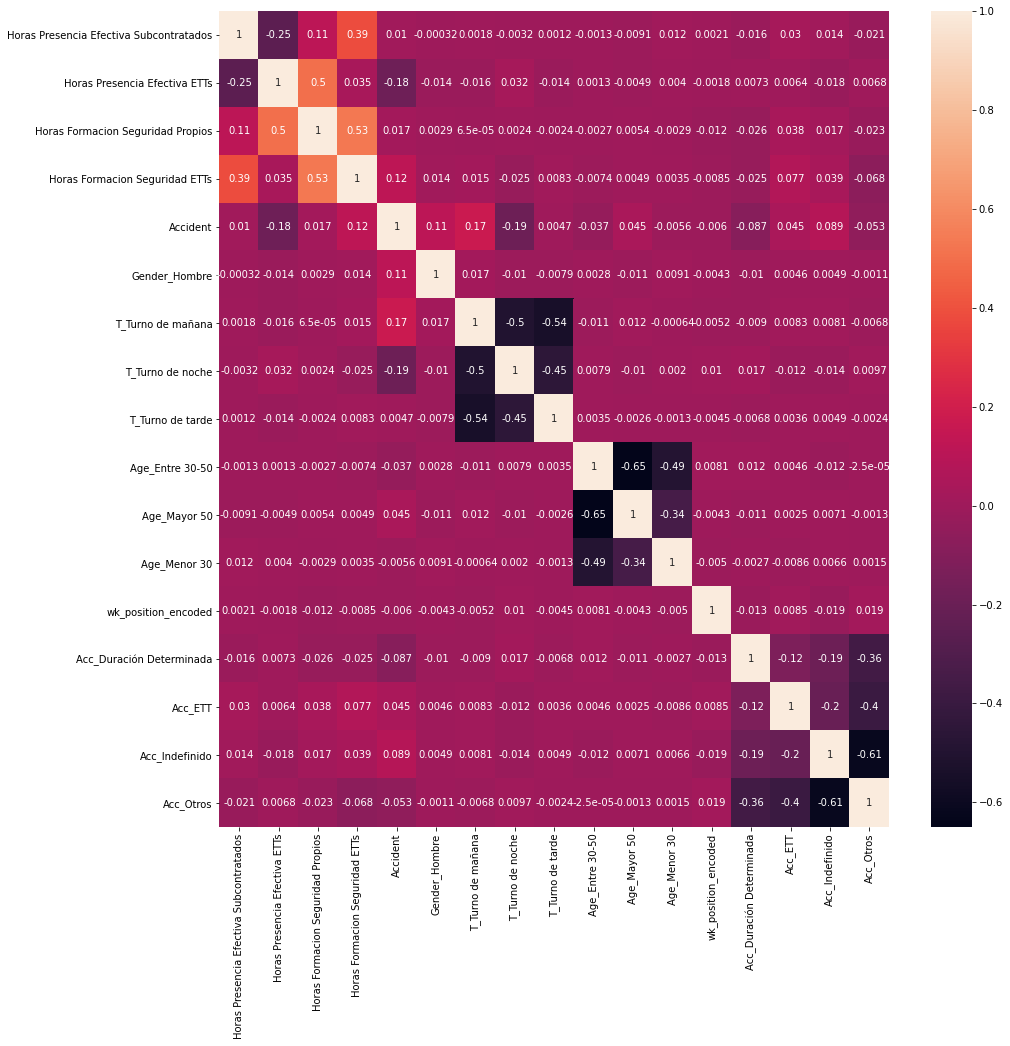

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15)) 

correlation_mat = staff_matrix.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

We are goign to start analyzing age and gender to see if it is related with the accidents.

We can see these values are independent to the number of accidents as they have small correlation. 

Values related to age are dependent from each other as they have strong negative correlations


In [133]:
age_gender = staff[['Age_Entre 30-50','Age_Mayor 50', 'Age_Menor 30','Gender_Hombre', 'Accident']]

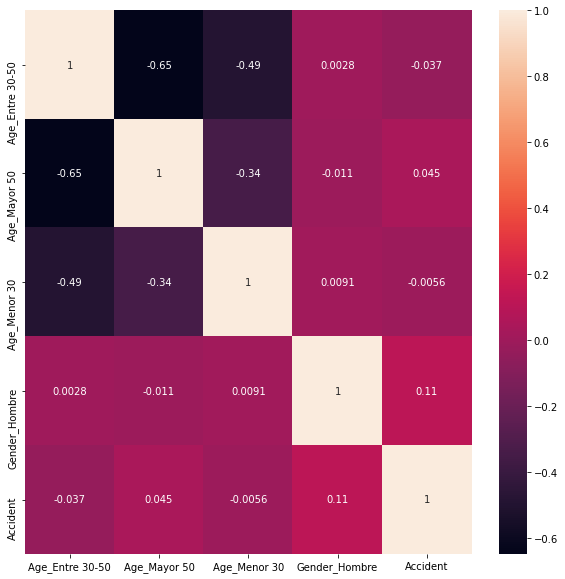

In [135]:
fig, ax = plt.subplots(figsize=(10,10)) 

correlation_mat = age_gender.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Type of worker and trainning hours

In [137]:
type_hour = staff[['Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros','Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident']]

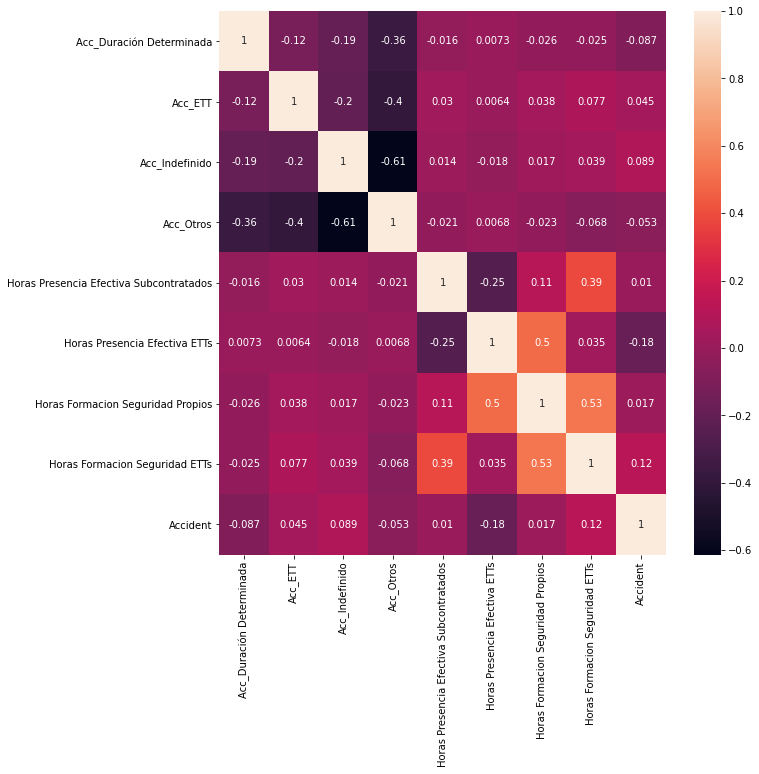

In [138]:
fig, ax = plt.subplots(figsize=(10,10)) 

correlation_mat = type_hour.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Countries correlation with accident

In [144]:
y = pd.get_dummies(staff.Pais, prefix='C')
y['Accident'] = staff['Accident']
y

,C_Argentina,C_Brasil,C_China,C_EEUU,C_España,C_Rep.Checa,C_Russia,Accident
0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
21205,1,0,0,0,0,0,0,0
21206,0,0,0,0,1,0,0,0
21207,0,0,0,1,0,0,0,0
21208,0,0,0,0,0,1,0,0


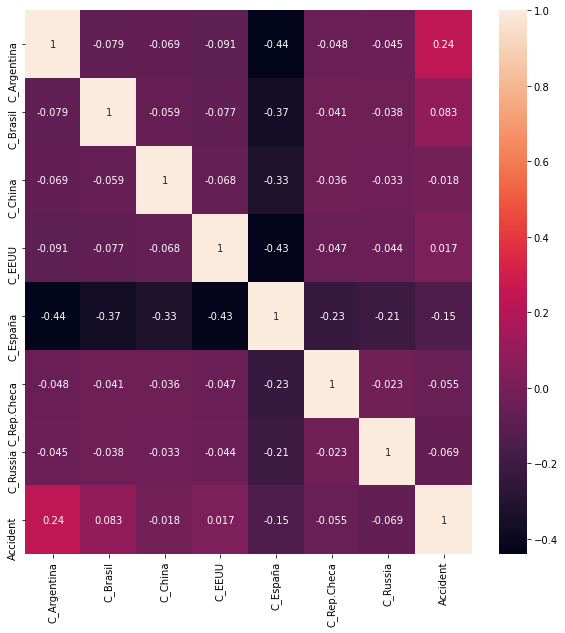

In [145]:
fig, ax = plt.subplots(figsize=(10,10)) 

correlation_mat = y.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

## data distribution



In [161]:
accidents = staff.groupby('Pais').agg('sum').reset_index()
accidents = accidents[['Pais', 'Accident']]
accidents

,Pais,Accident
0,Argentina,915.0
1,Brasil,432.0
2,China,173.0
3,EEUU,383.0
4,España,2243.0
5,Rep.Checa,30.0
6,Russia,4.0


In [165]:
employees = staff.groupby('Pais').agg('count').reset_index()
employees = employees[['Pais', 'Accident']]
employees.rename(columns={'Accident':'Employees'}, inplace=True)
employees['Accidents'] = accidents['Accident']
employees

,Pais,Employees,Accidents
0,Argentina,1809,915.0
1,Brasil,1327,432.0
2,China,1041,173.0
3,EEUU,1743,383.0
4,España,14325,2243.0
5,Rep.Checa,518,30.0
6,Russia,447,4.0


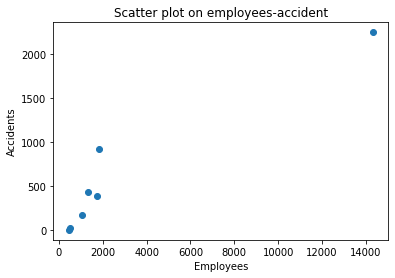

In [167]:
import matplotlib.pyplot as plt

plt.scatter(employees['Employees'], employees['Accidents'])
plt.title('Scatter plot on employees-accident')
plt.xlabel('Employees')
plt.ylabel('Accidents')
plt.show()

### deberia usar esto ???
Cramér's coefficient matrix

## Feature filter by variance

If a variable has a variation near to 0 that means that variable doesnt have much change, so it doesnt represent when change happens. We will want to discard those variables with poor variance

In [130]:
##All variables seem to be variable

staff.var()

Planta                                     3.790801e+02
Horas Presencia Efectiva Subcontratados    2.962635e+08
Horas Presencia Efectiva ETTs              4.126179e+09
Horas Formacion Seguridad Propios          2.625728e+05
Horas Formacion Seguridad ETTs             1.053749e+05
Accident                                   1.582450e-01
Gender_Hombre                              7.891754e-02
T_Turno de mañana                          2.351227e-01
T_Turno de noche                           2.082174e-01
T_Turno de tarde                           2.198907e-01
Age_Entre 30-50                            2.497156e-01
Age_Mayor 50                               2.142658e-01
Age_Menor 30                               1.637308e-01
wk_position_encoded                        5.190943e+04
Acc_Duración Determinada                   8.951351e-02
Acc_ETT                                    1.034758e-01
Acc_Indefinido                             1.823743e-01
Acc_Otros                                  2.481

# Chi squared feature selection